In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')


In [5]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
                 Station Name   Measurement Timestamp  Air Temperature  \
0  Oak Street Weather Station  05/22/2015 03:00:00 PM              NaN   
1  Oak Street Weather Station  05/22/2015 05:00:00 PM              NaN   
2  Oak Street Weather Station  05/22/2015 06:00:00 PM              NaN   
3  Oak Street Weather Station  05/22/2015 07:00:00 PM              NaN   
4  Oak Street Weather Station  05/22/2015 08:00:00 PM              NaN   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                   7.0      55.0             0.0            0.0         1.4   
1                   6.3      56.0             0.0            0.0         1.4   
2                   6.5      54.0             0.0            0.0         1.4   
3                   6.3      53.0             0.0            0.0         1.4   
4                   6.4      52.0             0.0            0.0         1.4   

   Precipitation Type  Wind Direction  Wind 

In [6]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 13  S

In [7]:
print(data.describe())

       Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     59066.000000          38843.000000  59141.000000    38843.000000   
mean         13.282062             10.643001     69.464517        0.187591   
std           9.945331              8.965170     15.714691        1.962149   
min         -19.890000            -20.100000     17.000000        0.000000   
25%           5.500000              4.000000     59.000000        0.000000   
50%          14.900000             12.100000     71.000000        0.000000   
75%          21.500000             18.100000     82.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   59141.000000  38843.000000        38843.000000    59141.000000   
mean        0.175327    185.445529            4.651932      178.980132   
std         1.300946    231.579782           16.168542      108.124898   
m

In [8]:
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
Station Name                       0
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
Measurement ID                     0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
print("\nData shape after dropping missing values:", data.shape)



Data shape after dropping missing values: (38768, 18)


In [11]:
print("\nSummary Statistics of the Dataset:")
print(data.describe())



Summary Statistics of the Dataset:
       Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     38768.000000          38768.000000  38768.000000    38768.000000   
mean         13.611832             10.634356     70.968479        0.187737   
std           9.936154              8.969845     15.948284        1.963699   
min         -19.500000            -20.100000     17.000000        0.000000   
25%           5.800000              4.000000     60.000000        0.000000   
50%          15.300000             12.100000     72.000000        0.000000   
75%          21.800000             18.100000     83.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   38768.000000  38768.000000        38768.000000    38768.000000   
mean        0.184861    185.791813            4.654741      171.104132   
std         1.228837    231.669581     

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

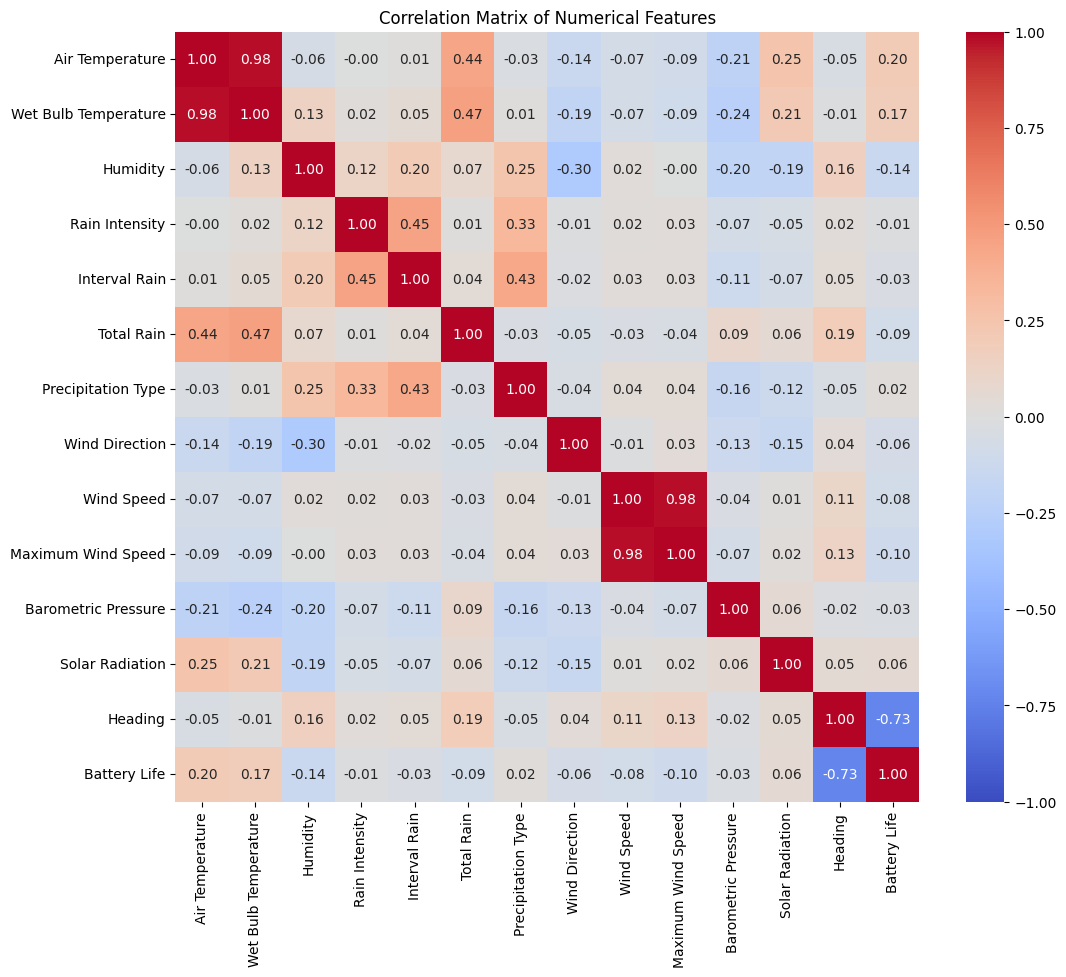

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

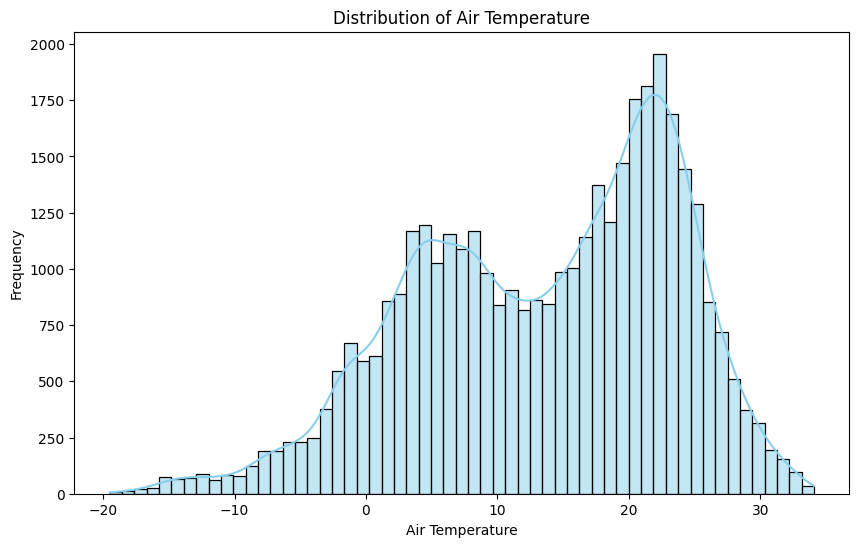

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Air Temperature'], kde=True, color='skyblue')
plt.title("Distribution of Air Temperature")
plt.xlabel("Air Temperature")
plt.ylabel("Frequency")
plt.show()


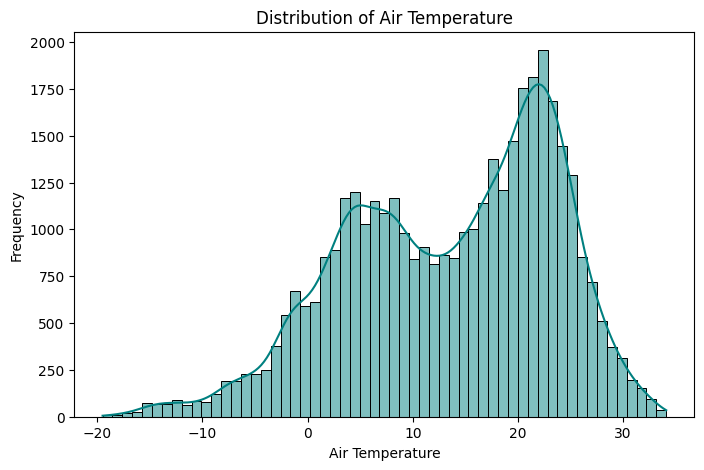

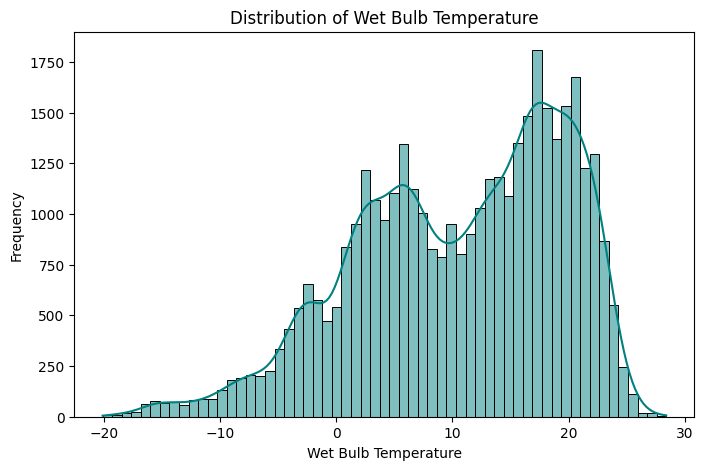

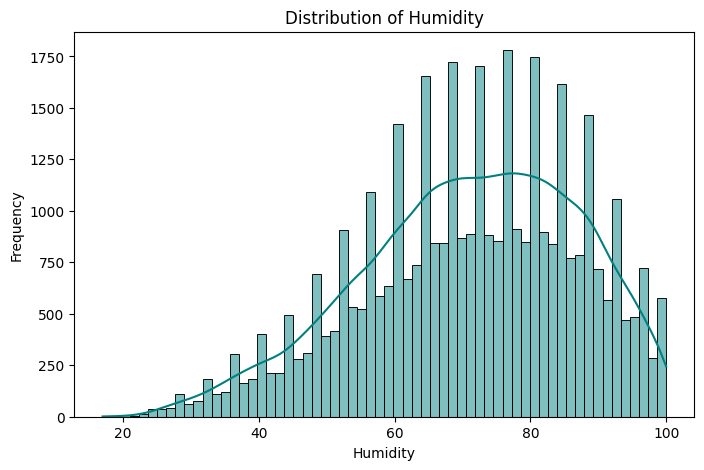

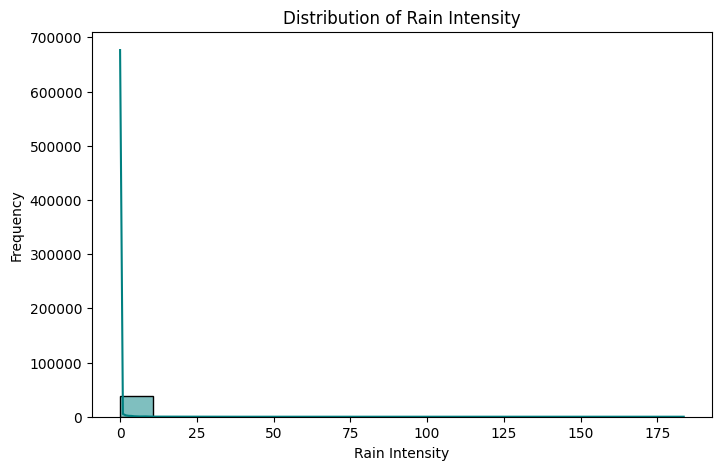

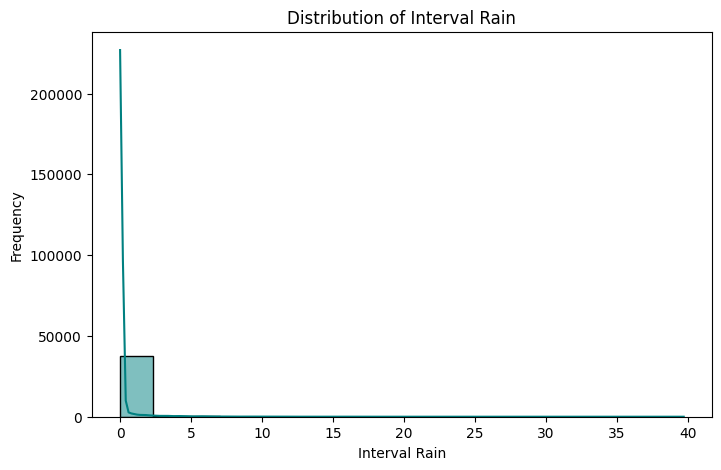

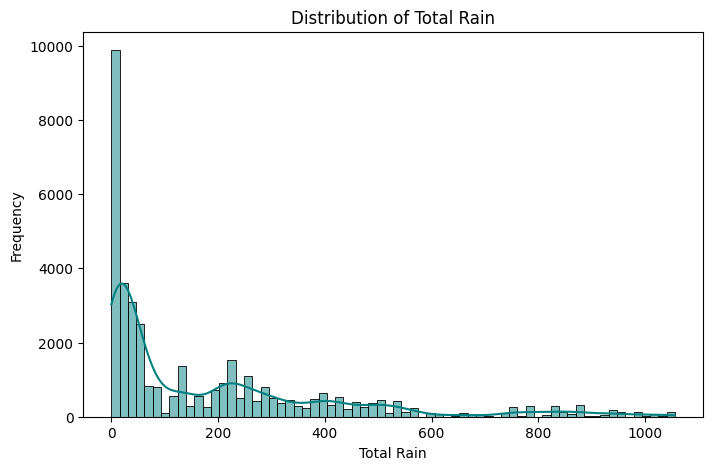

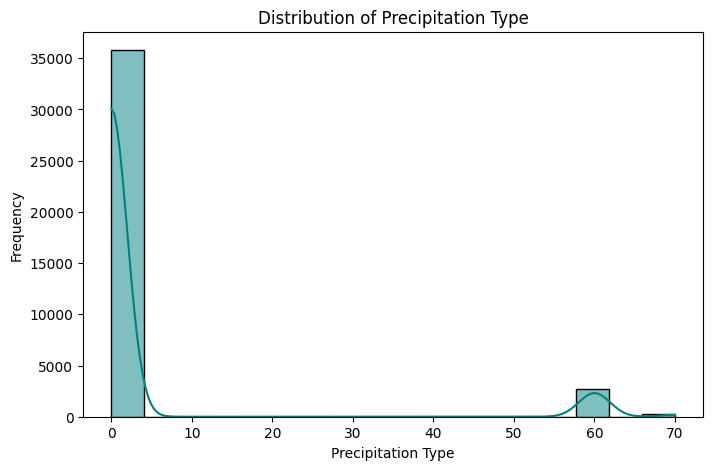

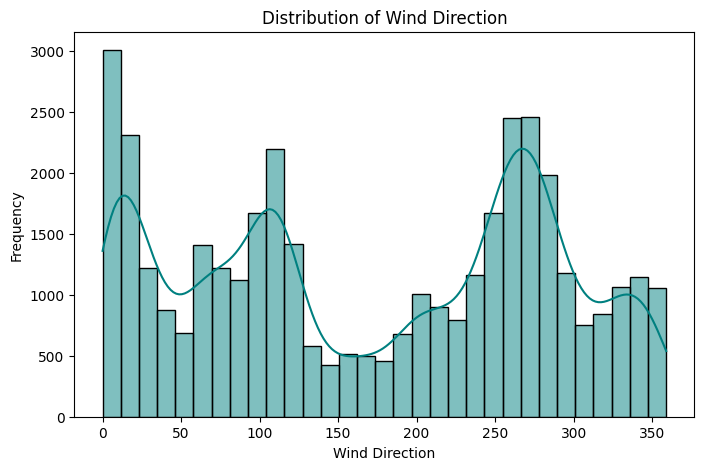

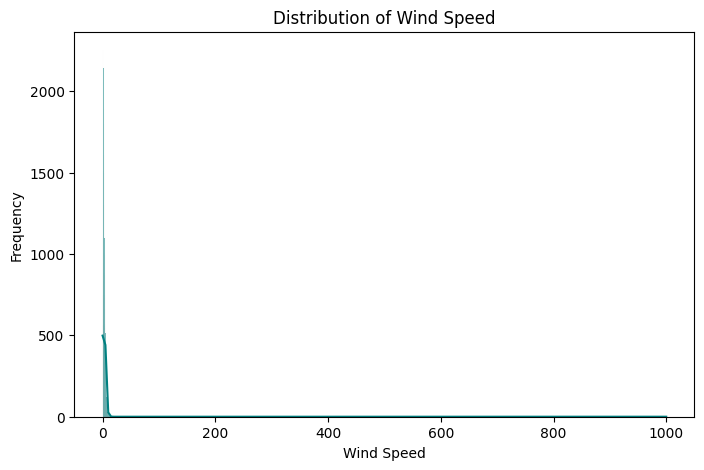

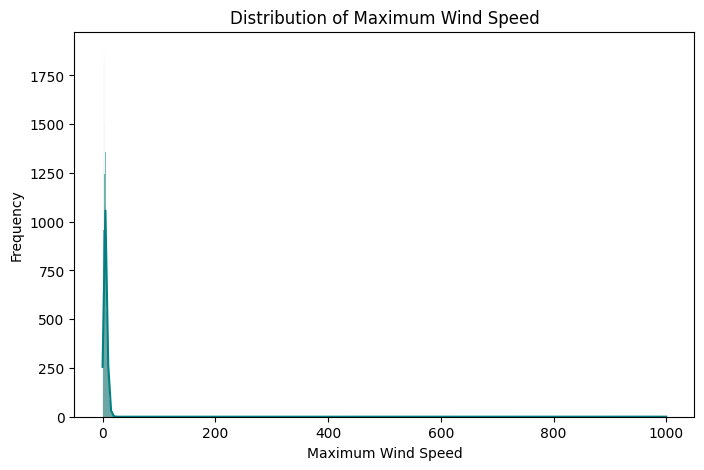

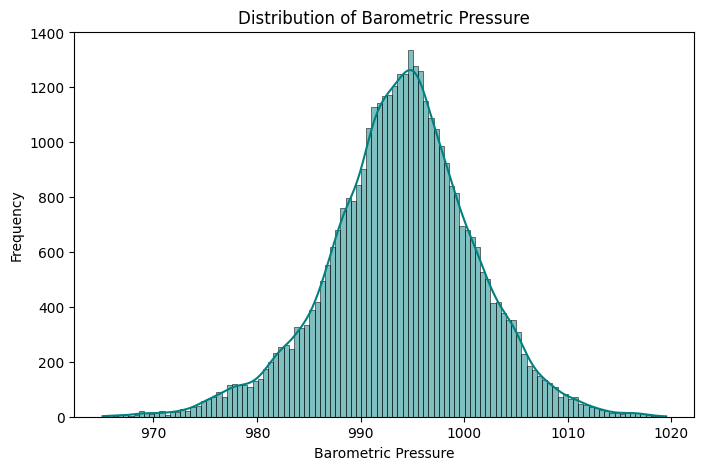

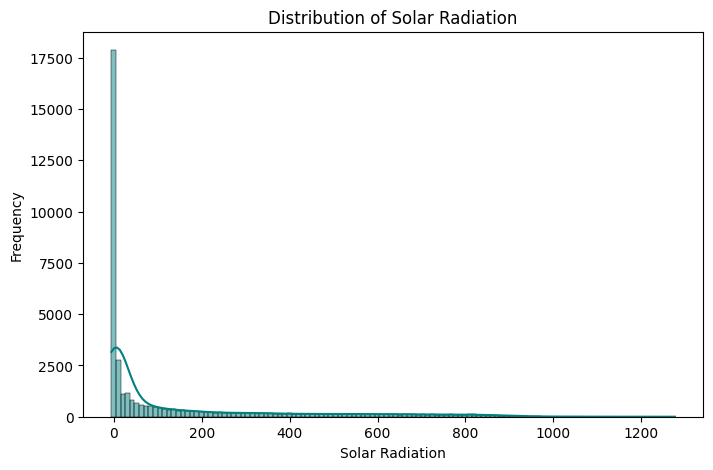

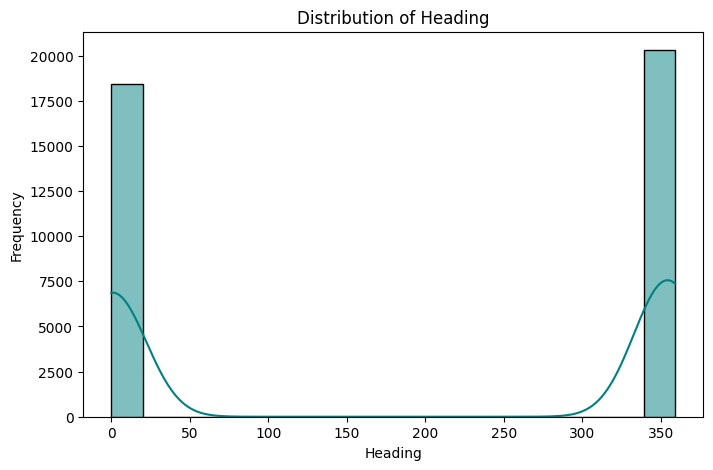

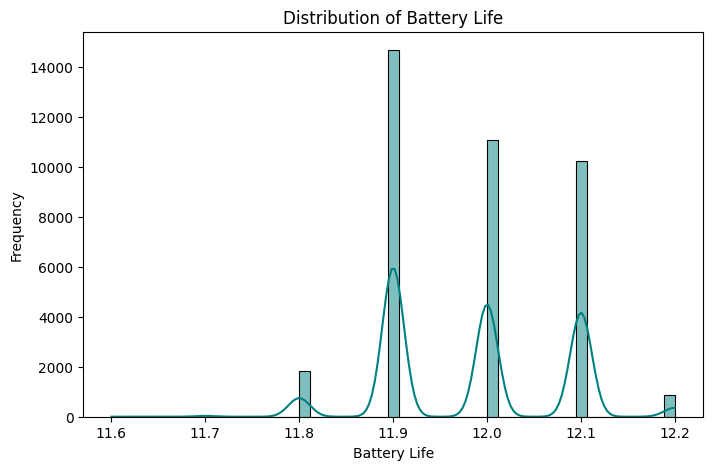

In [15]:
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, color='teal')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [16]:
features = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID', 'Air Temperature'])
target = data['Air Temperature']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [22]:
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("\nCNN Model Summary:")
model.summary()


CNN Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 12, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 32)              │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 352)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          17,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,021 (86.02 KB)

 Trainable params: 22,021 (86.02 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

Epoch 1/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 33.6834 - mae: 3.2703 - val_loss: 0.2266 - val_mae: 0.3693
Epoch 2/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 1.8938 - mae: 0.9001 - val_loss: 0.4380 - val_mae: 0.5621
Epoch 3/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.1969 - mae: 0.7964 - val_loss: 0.1182 - val_mae: 0.2472
Epoch 4/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.8508 - mae: 0.6686 - val_loss: 0.1410 - val_mae: 0.2641
Epoch 5/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.9800 - mae: 0.6068 - val_loss: 0.0713 - val_mae: 0.2040
Epoch 6/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.7739 - mae: 0.5487 - val_loss: 0.0889 - val_mae: 0.2021
Epoch 7/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.5966 - mae: 0.4916 - val_loss: 0.0637 - val_mae: 0.1895
Epoch 8/100
1939/1939 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.4019 - mae: 0.4622 - val_loss: 0.0915 - val_mae: 0.2216
Epoch 9/100
1939/1939 ━

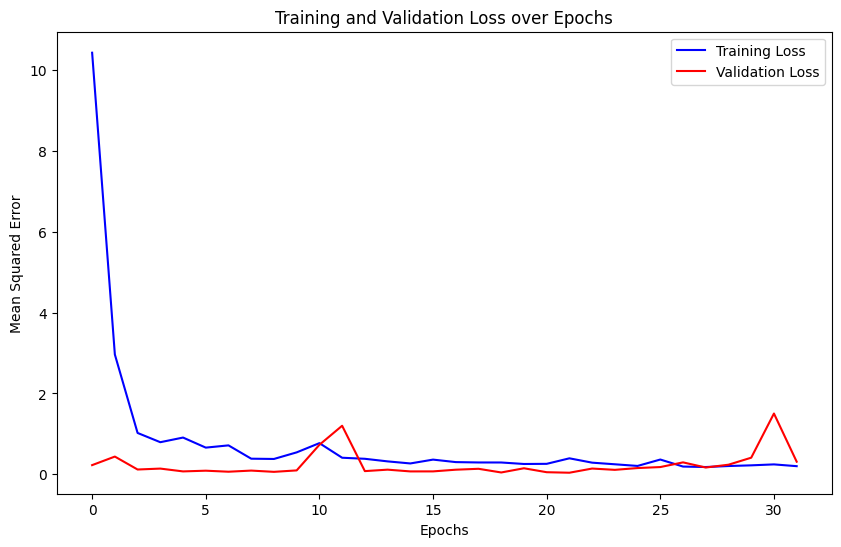

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(X_test_cnn)


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  explained_variance = explained_variance_score(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")



Evaluation Metrics:
Mean Squared Error (MSE): 0.0388
R^2 Score: 0.9996
Root Mean Squared Error (RMSE): 0.1969
Mean Absolute Error (MAE): 0.1493
Explained Variance Score: 0.9997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


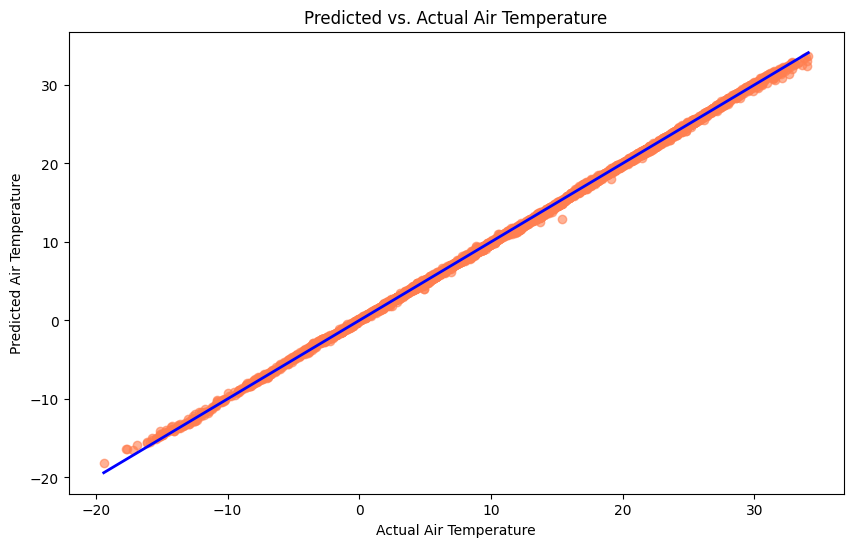

In [31]:
#Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title("Predicted vs. Actual Air Temperature")
plt.xlabel("Actual Air Temperature")
plt.ylabel("Predicted Air Temperature")
plt.show()


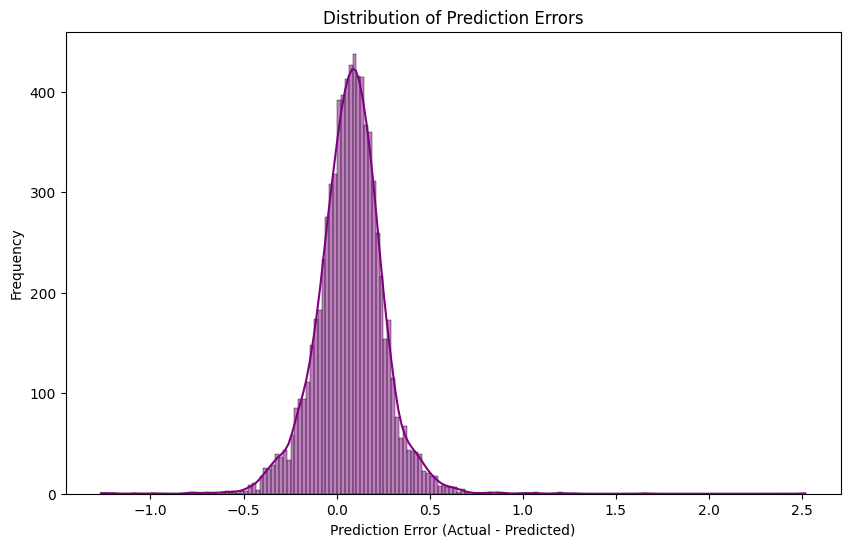

In [32]:
errors = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='purple')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

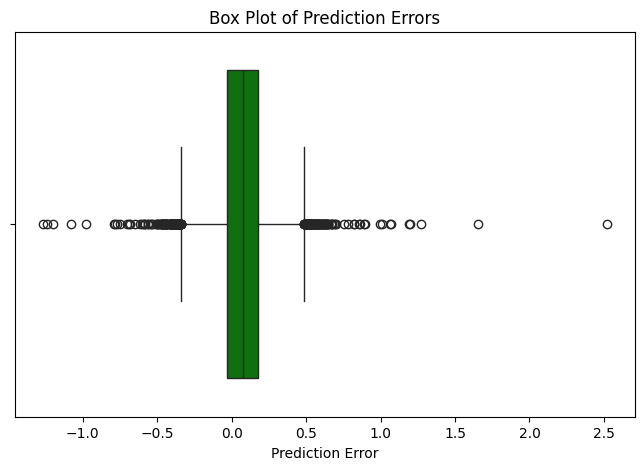

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=errors, color='green')
plt.title("Box Plot of Prediction Errors")
plt.xlabel("Prediction Error")
plt.show()

In [34]:
print("\nModel Summary for CNN Architecture:")
model.summary()


Model Summary for CNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 12, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 32)              │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 352)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          17,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,065 (258.07 KB)

 Trainable params: 22,021 (86.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,044 (172.05 KB)